In [32]:
# Section to import the necessary (or potentially useful) packages

# In order to plot
from matplotlib import pyplot as plt
# For functions, arrays, and other useful maths things
import numpy as np
# In case numpy does have what you want
import math
# In order for python to read the txt file (or other format)
import pandas as pd
# In order to fit data to functional model
from scipy.optimize import curve_fit

# Define unit complex number to be used later. Not using i since that is a common indicator for loops
j=complex(0,1)

In [3]:
# Give the string of the file path on your computer to the file of data you want to examine
# For a mac, I believe one can get this from left clicking on the file and pressing 'get info'
# In the get info, one can copy the file path
# The name SHOULD be changing for different users
name='/Users/christophermdonohue/Desktop/Older Cornell Stuff/Spring 2021/Intermediate Lab/extra resistor 1.txt'

# This actually takes what's in the file and turns it into a data frame, which can be used in python to investigate
# the data
# The first part is the file path, which here is name
# the second part explains how the data is separated. For instance, with this file, the different values of data
# on a line are separated by a space. For a csv file, one would probably write: sep=',' instead
df=pd.read_csv(name,sep=' ')

In [4]:
# Not a necessary cell, just shows what reading the file gives us. The labels at the top of the txt file don't actually 
# align with the numbers below (it's sort of a weird format). This allows us to know how to pull
# the data out of the data frame in the correct way in the next cell

df

,#,HZ,S,RI,R,50
0,100000,-0.010483,0.000053,NaN,NaN,NaN
1,599000,-0.010160,0.000379,NaN,NaN,NaN
2,1098000,-0.010177,0.000660,NaN,NaN,NaN
3,1597000,-0.010154,0.000920,NaN,NaN,NaN
4,2096000,-0.010141,0.001157,NaN,NaN,NaN
...,...,...,...,...,...,...
96,48004000,-0.006405,0.023275,NaN,NaN,NaN
97,48503000,-0.006377,0.023538,NaN,NaN,NaN
98,49002000,-0.006247,0.023757,NaN,NaN,NaN
99,49501000,-0.006236,0.023986,NaN,NaN,NaN


In [66]:
# Get the frequency out of the dataframe 
# '#' is the name of the column in the dataframe where the frequencies are, .values turns this into an array
f=df['#'].values

# Get arrays of imaginary and real parts of the reflection cofficient 
# Once again note that the data frame column labels don't directly match up with what the values are due to the 
# nature of the text file
# If I messed up the order of the real and imaginary parts written in the file, just switch them below
im=df['HZ'].values
re=df['S'].values

# Calculate the reflection coefficient (I think it's called that) for different frequencies
gamma=re+im*j

# Calculate Impedance based on Reflection Coefficient (I think this is the formula, but one should probably check)
Z=50*(gamma+1)/(gamma-1)

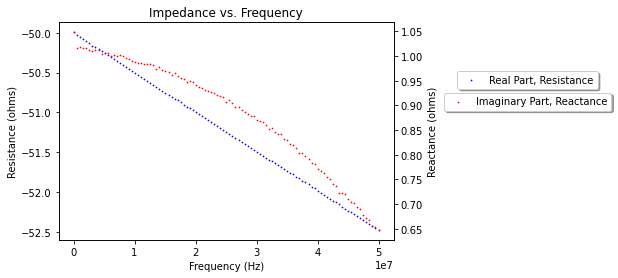

In [73]:
# Initialize figure
fig,ax=plt.subplots()

# Plot the scatter of points for resistance, Z.real gives real part of Z
# If want solid line, do ax.plot instead of ax.scatter
# s=.5 controls point size, color='blue' makes the points blue, label creates the label for the legend
ax.scatter(f,Z.real,s=.5,color='blue',label='Real Part, Resistance')

# Creates a parallel graph, allows us to have two vertical axes
ax2=ax.twinx()
# Plot the reactance, Z.imag gives imaginary part of Z
ax2.scatter(f,Z.imag,s=.5,color='r',label='Imaginary Part, Reactance')

# Labels the axes
plt.title('Impedance vs. Frequency')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Resistance (ohms)')
ax2.set_ylabel('Reactance (ohms)')

# Puts the legends for the different lines
# loc gives general location, and box_to_anchor moves it around, shadow gives box shadow
#  ncol gives one column? (not sure)
ax2.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.4, 0.8), shadow=True, ncol=1)
ax2.legend(loc='upper center', bbox_to_anchor=(1.4, .7), shadow=True, ncol=1)

In [68]:
# Examples of functions to fit data too
# First entry should be the input, here that's freuency
# the rest should be the parameters involved

def coth(f,a,b):
    return 75/np.tanh((a+i*b)*f)
def Recoth(f,a,b):
    y=coth(f,a,b)
    return y.real
def Imcoth(f,a,b):
    y=coth(f,a,b)
    return y.imag
def straight_line(f,a,b):
    return a*f+b

In [69]:
# Fitting a curve to data
# param gives back the parameters of the fit
# For examples: below for the fit of a*x+b, param[0]=a, param[1]=b
# param_cov is the covariance matrix

# Inputs to the function:
# 1st: The function to be fit with parameters
# 2nd: input, here that would be frequency
# 3rd: fitting data, here trying to get the resistance

# bounds: In the case of more complicated functions, it might be useful to set bounds on the parameters
# or else the fit might come to something nonsensical
# Here: -100<a<0 and -100<b<0

# p0: This gives an initial guess for the parameter. Similar to the bound, for more complicated functions for fitting
# this can help you get a reasonable fit
# Here: The initial guess is (a,b)=(-5.0E-8,-50)

# Note: bounds, and p0 are not always necessary and can be left out if one wants

param, param_cov = curve_fit(straight_line,f,Z.real,bounds=((-100,-100),(0,0)),p0=(-5.0E-8,-50))

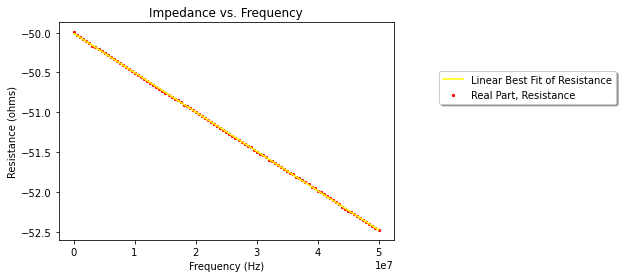

In [72]:
# Example of plotting the fitting function with data
# Should use the two axes approach shown previously if one wants to show fits on resistance and reactance

fig,ax=plt.subplots()
ax.scatter(f,Z.real,s=5,color='red',label='Real Part, Resistance')
ax.plot(f,straight_line(f,param[0],param[1]),color='yellow', label='Linear Best Fit of Resistance')

plt.title('Impedance vs. Frequency')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Resistance (ohms)')


ax.legend(loc='upper center', bbox_to_anchor=(1.4, 0.8), shadow=True, ncol=1)


Text(0, 0.5, 'Residuals (ohms)')

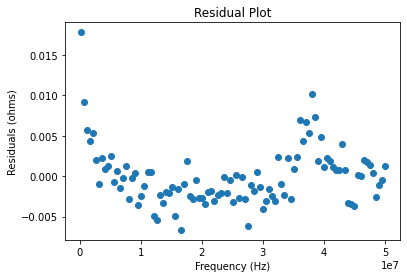

In [71]:
# In case one wants to plot the residuals
fig,ax=plt.subplots()

res=Z.real-straight_line(f,param[0],param[1])

ax.scatter(f,res)

plt.title('Residual Plot')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Residuals (ohms)')